# IMPORTING FOOTBALL STATISTICS

In [12]:
from bs4 import BeautifulSoup
import requests
import pandas.util.testing as tm
import pandas as pd
import numpy as np
import re

from matplotlib import style
# generate random integer values
from numpy.random import seed
from numpy.random import randint
from numpy.random import randn
import seaborn as sns
import statistics 
import string
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import sklearn
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Cleaning Dataset of Market Value, Dropping Irrelevant columns

In [13]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

balldata = pd.read_csv(r"C:\Users\mysto\Downloads\Updated_Football_Statistics_SC1015.csv")
balldata.head()



,Unnamed: 0,Player,Market Value,Dirty Market Value,Unclean Market value,Nation,Pos,Club,League,Age,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,0,Kylian Mbappé,180.0,€180.00,€180.00m,FRA,FW,Paris S-G,Ligue1,20.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,1,Raheem Sterling,128.0,€128.00,€128.00m,ENG,FW,Manchester City,Premier Leauge,24.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,2,Neymar,128.0,€128.00,€128.00m,BRA,"MF,FW",Paris S-G,Ligue1,27.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,3,Sadio Mané,120.0,€120.00,€120.00m,SEN,FW,Liverpool,Premier Leauge,27.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,4,Mohamed Salah,120.0,€120.00,€120.00m,EGY,FW,Liverpool,Premier Leauge,27.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0


Checking Shape of data, investigating data types

In [14]:
balldata.drop(['Unnamed: 0'],axis=1,inplace=True)
balldata.drop(['Dirty Market Value'],axis=1,inplace=True)
balldata.drop(['Unclean Market value'],axis=1,inplace=True)
balldata.head()

,Player,Market Value,Nation,Pos,Club,League,Age,MP,Starts,Min,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,Kylian Mbappé,180.0,FRA,FW,Paris S-G,Ligue1,20.0,49.0,41.0,3856.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,Raheem Sterling,128.0,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,56.0,4968.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,Neymar,128.0,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,31.0,2757.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,Sadio Mané,120.0,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,61.0,5327.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,Mohamed Salah,120.0,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,64.0,5579.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0


In [15]:
print("Data type : ", type(balldata))
print("Data dims : ", balldata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (517, 50)


Let us look at the distribution of the following numeric variables. Our numeric variables include the age of the players, and the minutes played by players over 2 seasons.

In [16]:

newballdata = pd.DataFrame(balldata[["Market Value","Age","Min"]])
newballdata.describe()


,Market Value,Age,Min
count,517.00000,363.000000,356.000000
mean,33.05706,24.046832,3610.696629
std,20.15584,3.266354,1418.034402
min,16.00000,15.000000,143.000000
25%,20.00000,22.000000,2518.750000
50%,27.00000,24.000000,3783.000000
75%,40.00000,26.000000,4803.000000
max,180.00000,34.000000,6174.000000


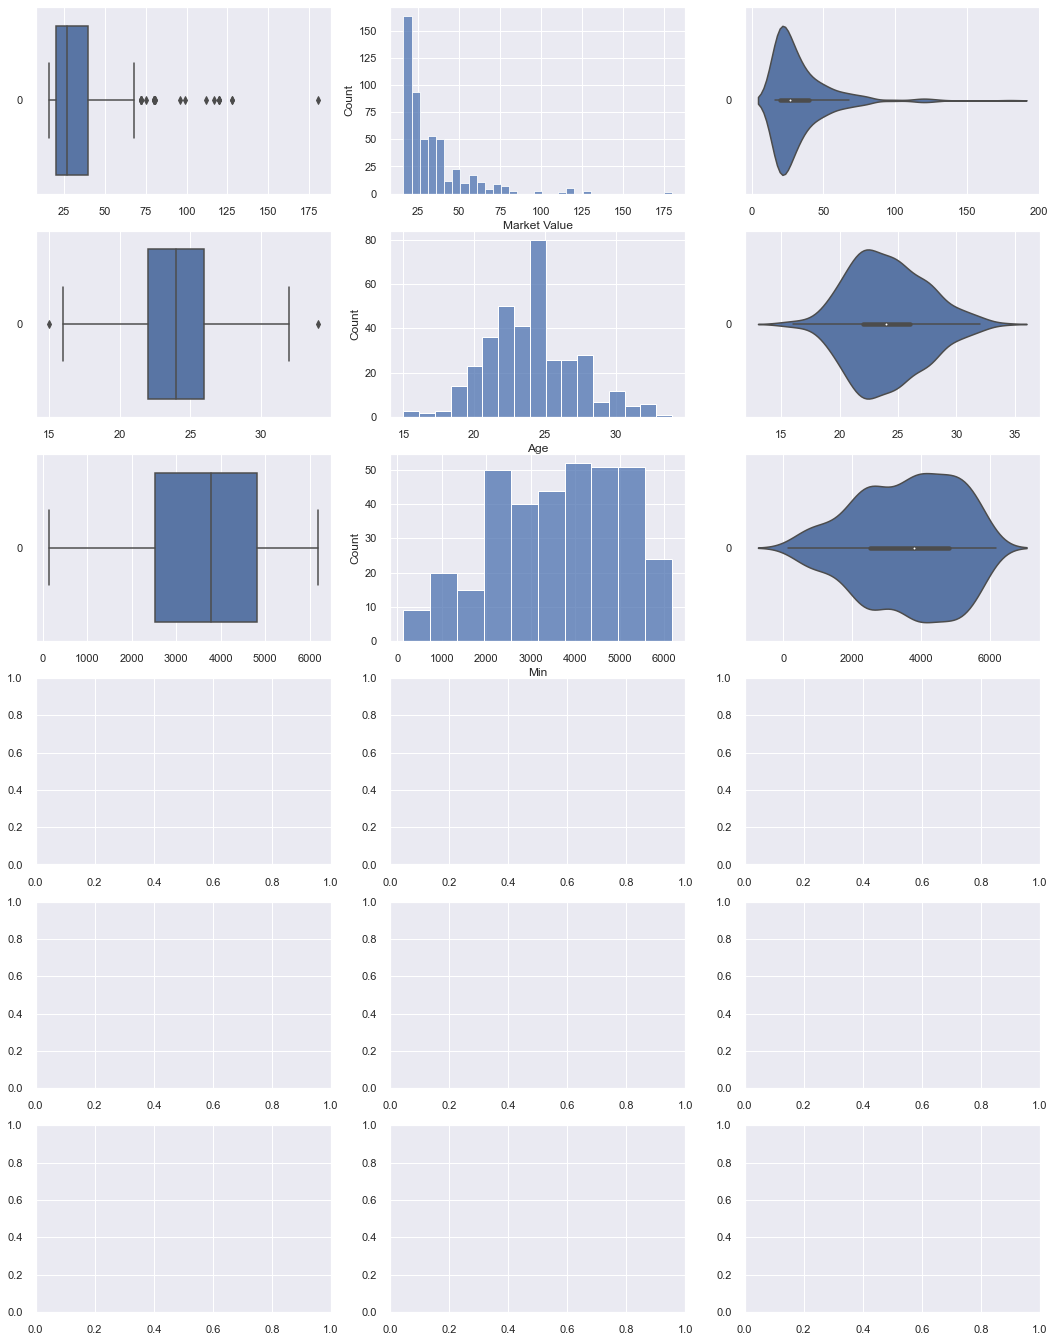

In [17]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in newballdata:
    sb.boxplot(data = newballdata[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = newballdata[var], ax = axes[count,1])
    sb.violinplot(data = newballdata[var], orient = "h", ax = axes[count,2])
    count += 1

As seen from the boxplots of Market Value and age, there are plenty of outliers which may skew the distribution of data. We can also visualise the overall distribution of the data of Market Value, Age, and Minutes played.

# Removing Outliers From Market Value, Minutes Played

In [20]:
#remove outliers for Market Value
df = balldata['Market Value']
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
balldata_fil = balldata[balldata['Market Value'] >= (Q1 - 1.5 * IQR)]
balldata_fil = balldata[balldata['Market Value'] <= (Q3 + 1.5 * IQR)]

#remove outliers for Age
df = balldata['Age']
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
balldata_fil = balldata_fil[balldata_fil['Age'] >= (Q1 - 1.5 * IQR)]
balldata_fil = balldata_fil[balldata_fil['Age'] <= (Q3 + 1.5 * IQR)]
balldata_fil.shape

(337, 50)

<AxesSubplot:>

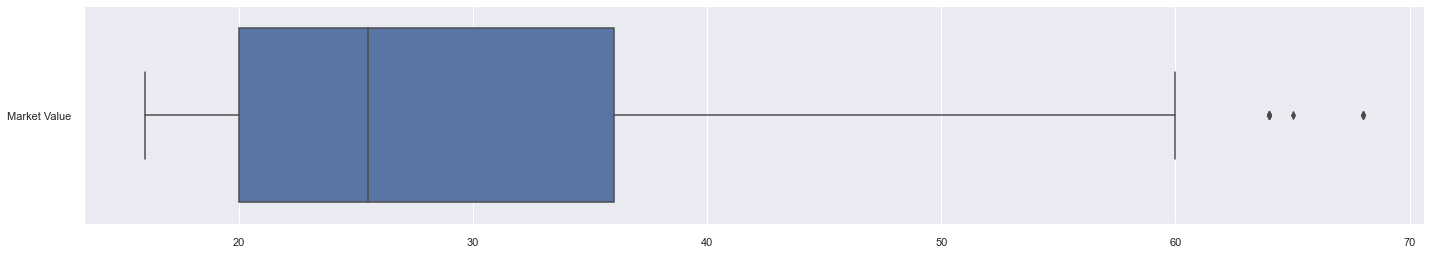

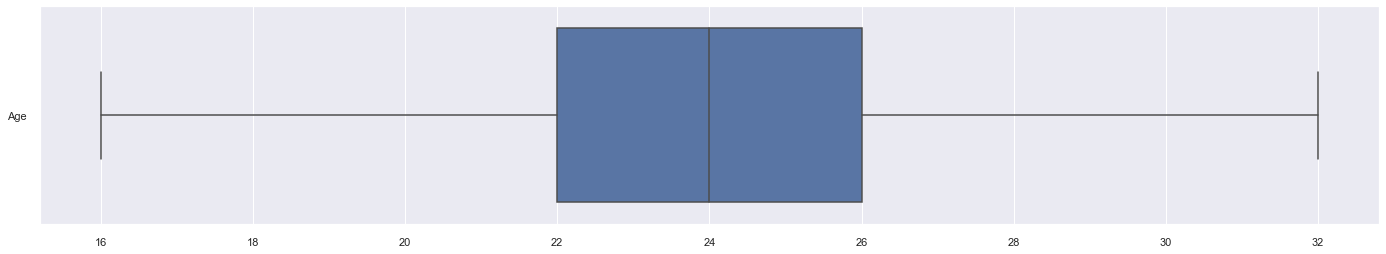

In [21]:


mv = pd.DataFrame(balldata_fil[["Market Value"]])
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = mv, orient = "h")

age = pd.DataFrame(balldata_fil[["Age"]])
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = age, orient = "h")


In [22]:
mins = pd.DataFrame(balldata[["Min"]])
data = [mv, age, mins]
df2 = pd.concat(data)
df2.describe()

,Market Value,Age,Min
count,337.000000,337.000000,356.000000
mean,29.891691,23.985163,3610.696629
std,12.799309,3.176797,1418.034402
min,16.000000,16.000000,143.000000
25%,20.000000,22.000000,2518.750000
50%,25.500000,24.000000,3783.000000
75%,36.000000,26.000000,4803.000000
max,68.000000,32.000000,6174.000000


These are the statistics of Market Value, Age, and minutes played after removing their outliers. We noticed that the mean and standard deviation have decreased after removing outliers.

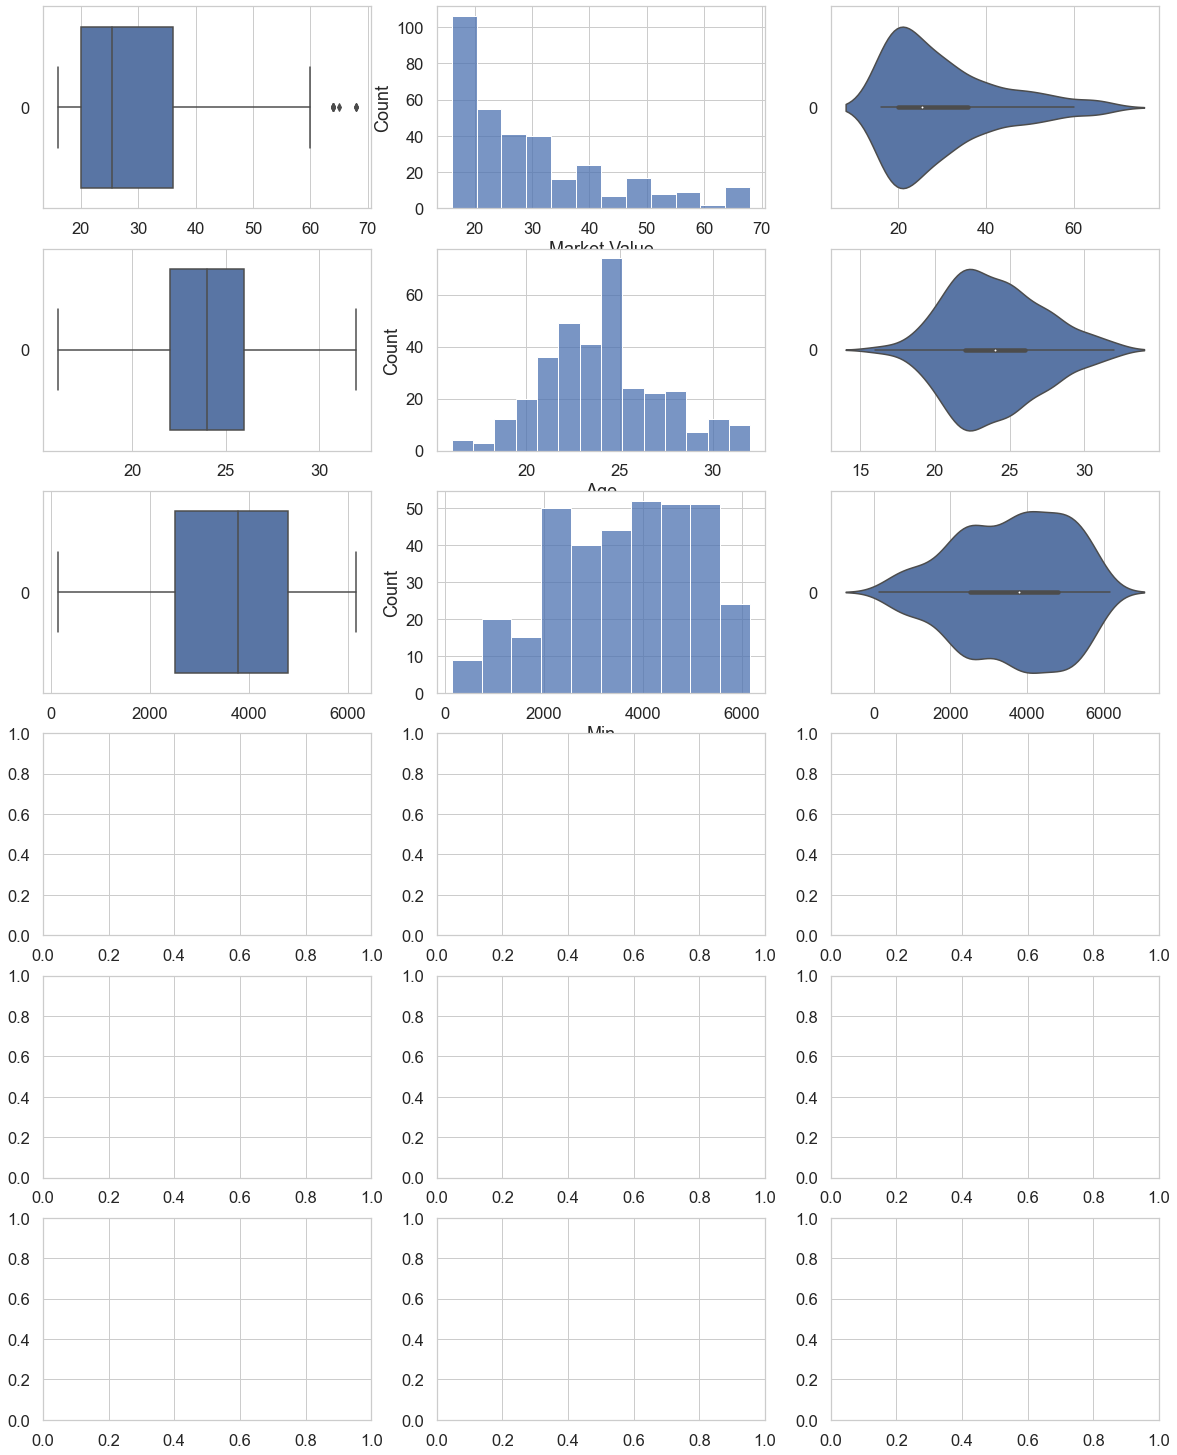

In [43]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(20, 26))

count = 0
for var in df2:
    sb.boxplot(data = df2[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = df2[var], ax = axes[count,1])
    sb.violinplot(data = df2[var], orient = "h", ax = axes[count,2])
    count += 1

As seen from the boxplots of Market Value, Age, and Minutes Played, the number of outliers have fallen drastically to improve the effectiveness of our analysis.

              Market Value       Age       Min
Market Value      1.000000  0.101191  0.247530
Age               0.101191  1.000000  0.389407
Min               0.247530  0.389407  1.000000


<AxesSubplot:>

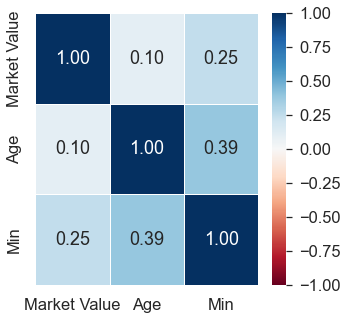

In [40]:
# Correlation Matrix
print(newballdata.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(5, 5))
sb.heatmap(newballdata.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

After printing the co-relation matrix the first thing we realised was that Age and Minutes played had an extremely poor linear correlation with Market Value at 0.10 & 0.25 respectively.


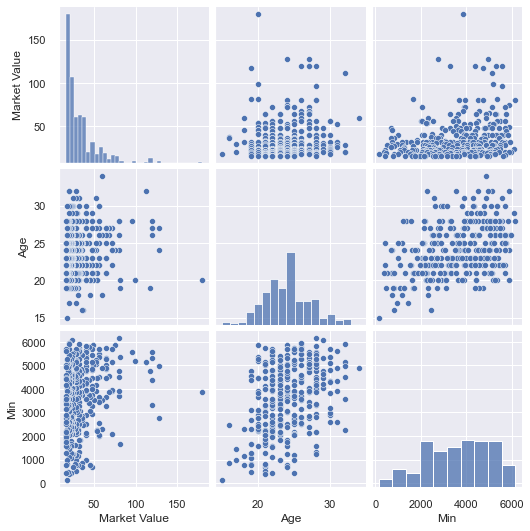

In [26]:
sb.pairplot(data = newballdata)

Plotted Scatterplot of Age and Minutes Played against Market Value to get a sense of the distribution of data.

# Market Value Against Club Ranking

C:\Users\mysto\AppData\Local\Temp\ipykernel_5104\989769921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balldata['CR'][i]=1
C:\Users\mysto\AppData\Local\Temp\ipykernel_5104\989769921.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balldata['CR'][i]=2
C:\Users\mysto\AppData\Local\Temp\ipykernel_5104\989769921.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balldata['CR'][i]=3


[Text(0.5, 0, 'Club Ranking'),
 Text(0, 0.5, 'Market Value in Million €'),
 Text(0.5, 1.0, 'MV vs Club')]

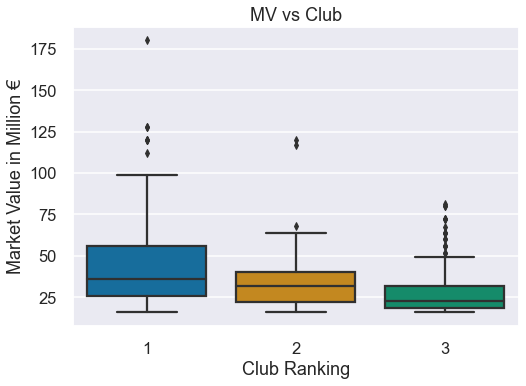

In [27]:

balldata['CR']=0
for i in range(0,len(balldata)):
    if(balldata['Club'][i]=='Paris S-G' or balldata['Club'][i]=='Manchester Utd' or balldata['Club'][i]=='Liverpool' or balldata['Club'][i]=='Real Madrid' or balldata['Club'][i]=='Barcelona' or balldata['Club'][i]=='Bayern Munich' or balldata['Club'][i]=='Juventus' or balldata['Club'][i]=='Atlético Madrid' or balldata['Club'][i]=='Inter' or balldata['Club'][i]=='Chelsea' or balldata['Club'][i]=='Manchester City' ):
        balldata['CR'][i]=1
    elif(balldata['Club'][i]=='Arsenal' or balldata['Club'][i]=='Tottenham' or balldata['Club'][i]=='Napoli' or balldata['Club'][i]=='Dortmund' or balldata['Club'][i]=='Leicester City' or balldata['Club'][i]=='Lyon' or balldata['Club'][i]=='Everton' or balldata['Club'][i]=='Valencia' or balldata['Club'][i]=='Sevilla' ):
        balldata['CR'][i]=2
    else:
        balldata['CR'][i]=3
        
Blue='#008fd5'
Red='#fc4f30'
Yellow='#e5ae37'
Green='#6d9045'
colorsz=[Blue,Green,Yellow]
balldata[['Market Value','Clr']]
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
ax=sns.boxplot(y='Market Value', x='CR',data=balldata,palette="colorblind")
ax.set(xlabel='Club Ranking', ylabel='Market Value in Million €',title='MV vs Club')

Clubs are ranked into 3 number types. From 1 being the top football clubs to 3 being the clubs of a lower ranking. It is evident that the median market values fall as the club ranking falls. For clubs with lower ranking, there were generally more outliers.

# Market Value Against Age, Playing Position, Leagues

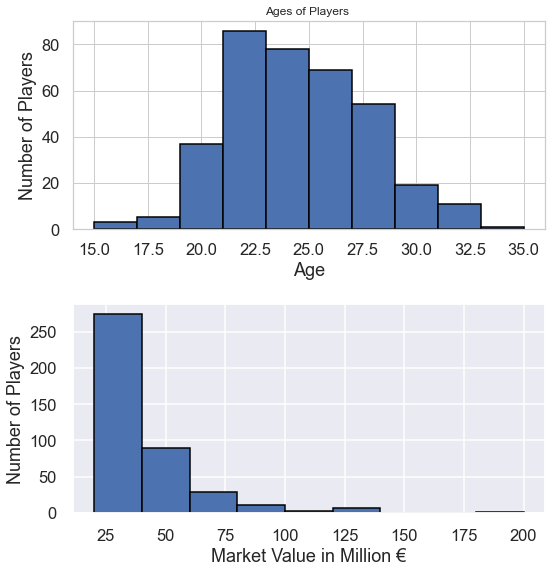

In [49]:
fig = plt.figure(figsize=(8,8))

plt.subplot(2, 1, 1)
plt.tight_layout()
style.use('seaborn')
plt.title('Ages of Players ')
plt.xlabel('Age')
plt.ylabel('Number of Players')
sns.set_context('talk')
binz=[15,17,19,21,23,25,27,29,31,33,35]
plt.hist(balldata['Age'],bins=binz,edgecolor='black')


plt.subplot(2, 1, 2)
plt.tight_layout()
style.use('seaborn')
plt.title('')
plt.xlabel('Market Value in Million €')
plt.ylabel('Number of Players')
sns.set_context('talk')
bins=[20,40,60,80,100,120,140,160,180,200]
plt.hist(balldata['Market Value'],bins=bins,edgecolor='black')



plt.show()




The barplots above show the distribution of Age and Market Value. 

[Text(0.5, -19.04000000000011, 'Top 5 Leagues in Europe '),
 Text(1.5850000000000009, 0.5, 'Market Value in Million €'),
 Text(0.5, 1.0, 'League vs MV')]

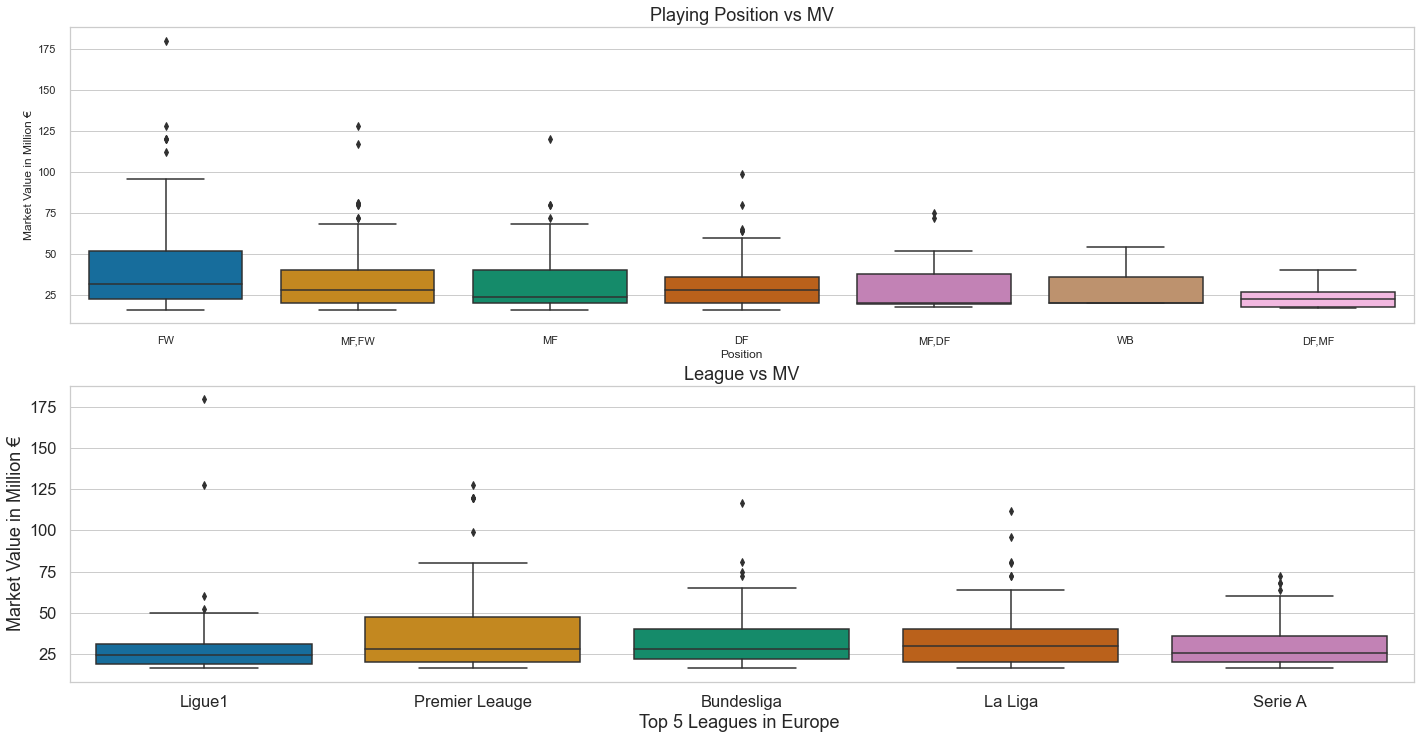

In [38]:
plt.subplot(3,1,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.set(rc={'figure.figsize':(20,15)}, font_scale=1.5, style='whitegrid')
ax=sns.boxplot(y='Market Value', x='Pos',data=balldata,palette="colorblind")
ax.set(xlabel='Position', ylabel='Market Value in Million €',title='Playing Position vs MV')

plt.subplot(3,1,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.set(rc={'figure.figsize':(20,15)}, font_scale=1.5, style='whitegrid')
ax=sns.boxplot(y='Market Value', x='League',data=balldata,palette="colorblind")
ax.set(xlabel='Top 5 Leagues in Europe ', ylabel='Market Value in Million €',title='League vs MV')

We first investigated how non-numeric variables such as playing position affects market value. By plotting out the box-plot, we noticed that Forwards had the highest median market value, followed by Defence then Midfield Forwards also had the largest Interquartile range, the highest number of outliers in Market Value, and generally have higher Market Value.

Next, we analysed how club ranking affect the market value of players. By selecting the top 5 leagues in the world, we noticed that the market values of players in particular leagues converge and are similar. Players in LaLiga had the highest median Market Value while Players in Premier League had the highest IQR with many outliers. On the other hand, Players in Ligue 1 and Serie A had smallest IQR and the least number of outliers. Therefore, Players of different leagues have large differences in Market Value.


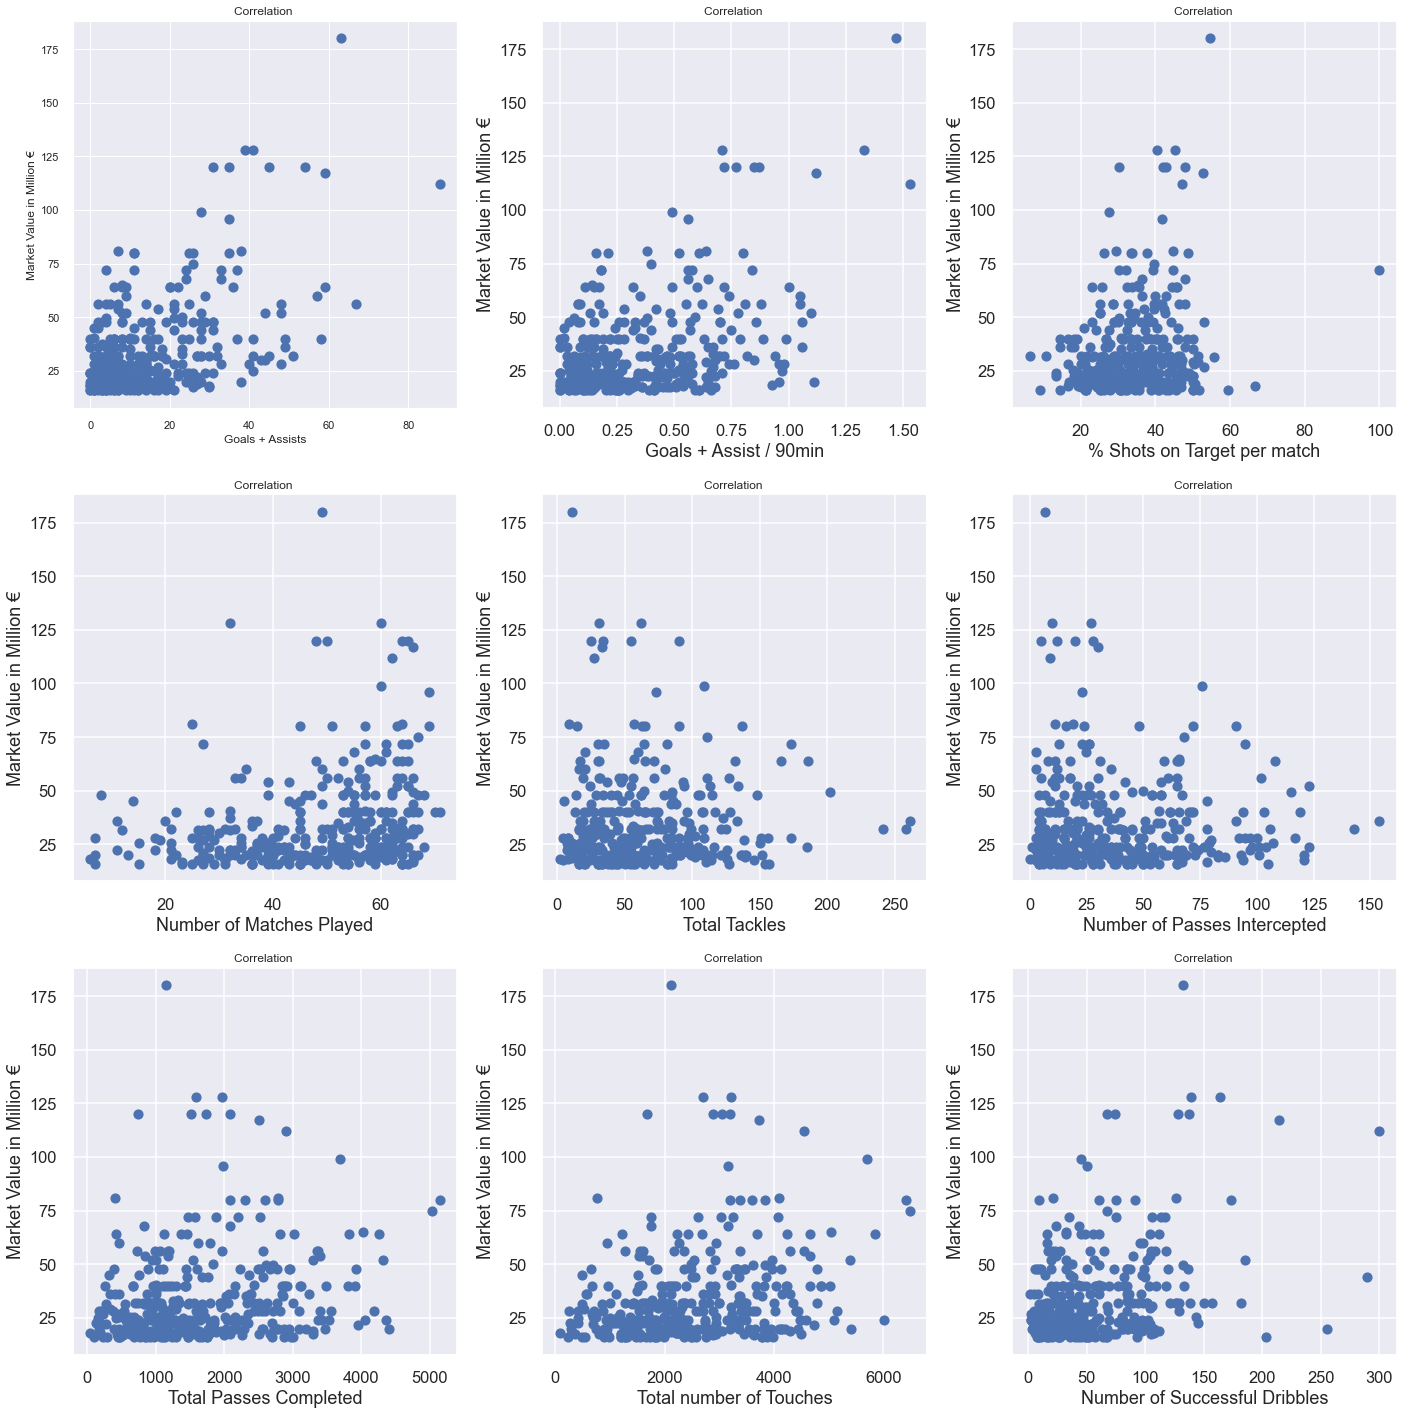

In [29]:
fig = plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Goals + Assists')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(balldata['Gls+Ast'],balldata['Market Value'],s=75)

plt.subplot(3,3,2)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Goals + Assist / 90min')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(balldata['G+A'],balldata['Market Value'],s=75)

plt.subplot(3,3,3)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('% Shots on Target per match')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(balldata['SoT%'],balldata['Market Value'],s=75)


plt.subplot(3,3,4)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Number of Matches Played')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(balldata['MP'],balldata['Market Value'],s=75)

plt.subplot(3,3,5)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Total Tackles')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(balldata['Tackle'],balldata['Market Value'],s=75)

plt.subplot(3,3,6)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Number of Passes Intercepted')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(balldata['Int'],balldata['Market Value'],s=75)

plt.subplot(3,3,7)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Total Passes Completed')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(balldata['Passes Completed'],balldata['Market Value'],s=75)

plt.subplot(3,3,8)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Total number of Touches')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(balldata['Touches'],balldata['Market Value'],s=75)

plt.subplot(3,3,9)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Number of Successful Dribbles')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(balldata['Succ_y'],balldata['Market Value'],s=75)

We plotted the scatterplots of other variables, and noticed Goals + Assists had the highest linear correlation to Market Value. We identified Goals + Assists to be an important variable that impacts the Market Value of a Football Player.

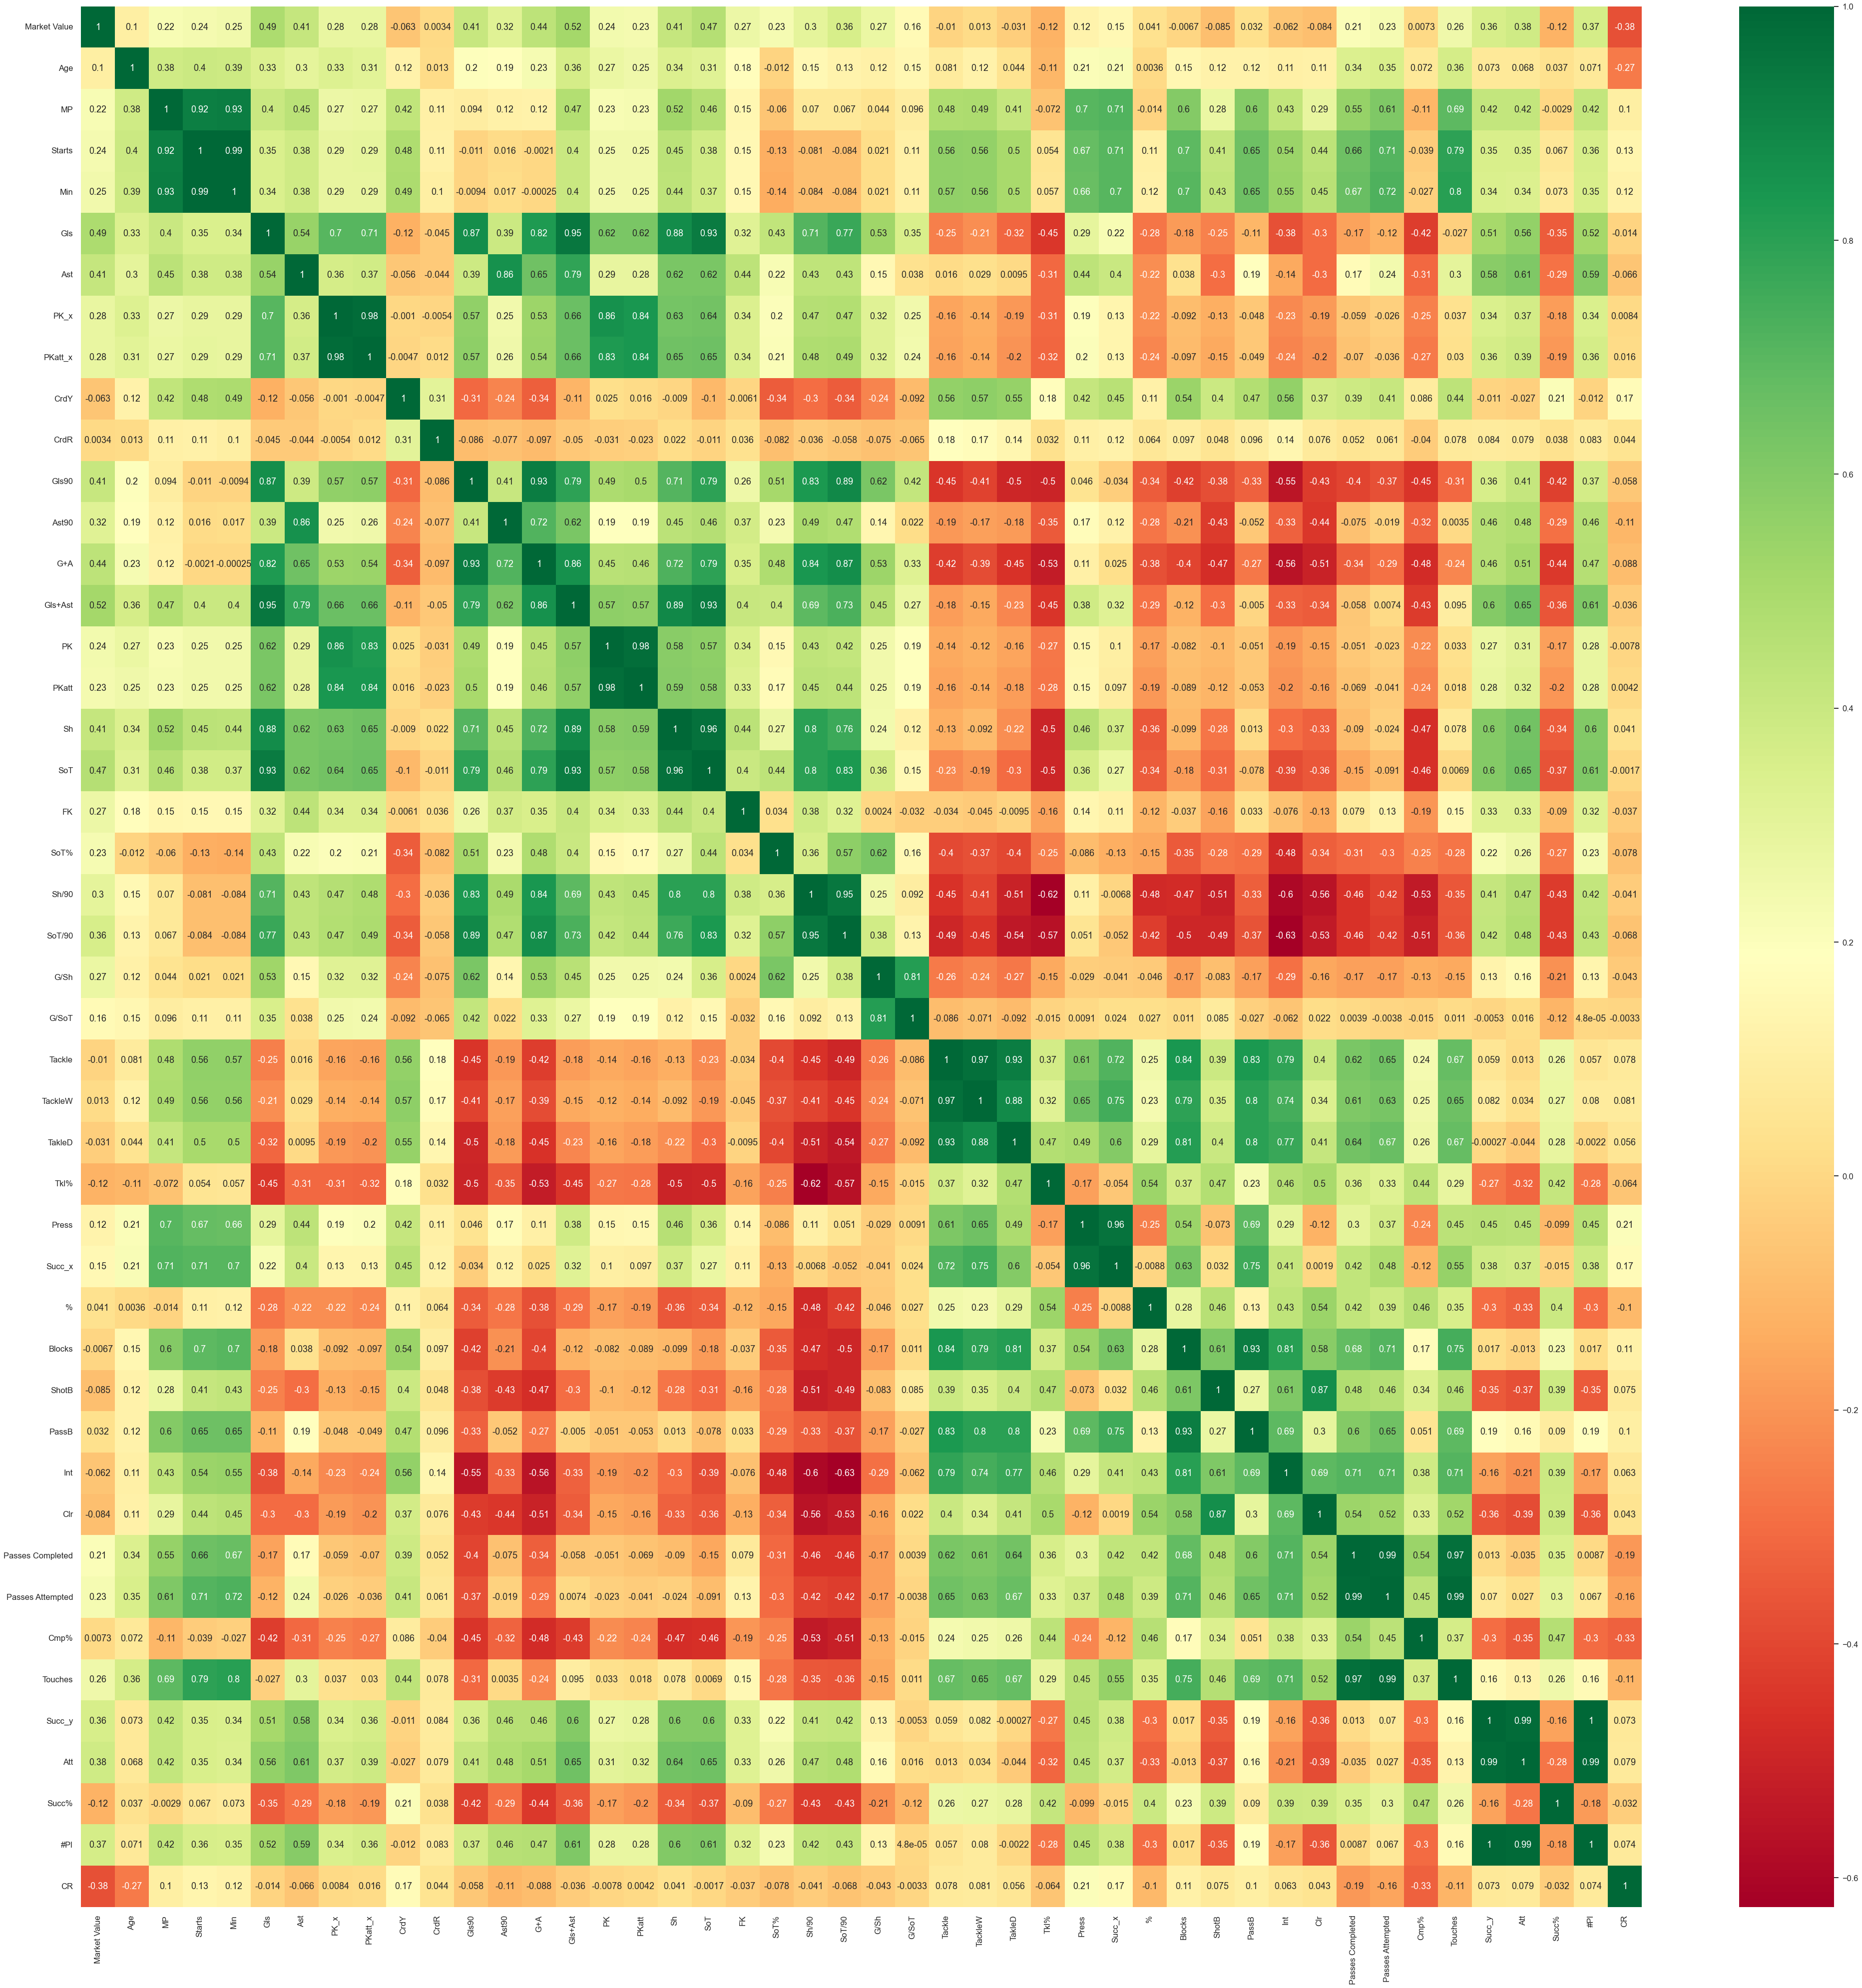

In [50]:
X = balldata.iloc[:,6::]  #independent columns
y = balldata.iloc[:,1]
X = balldata.iloc[:,6::]  #independent columns
y = balldata.iloc[:,1]
corrmat = balldata.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(70,70))
plt.tight_layout()
sns.set_context('talk')
#plot heat map
g=sns.heatmap(balldata[top_corr_features].corr(),annot=True,cmap="RdYlGn")

After plotting the correlation Heat Map to get a clear sense of which variable was important, goals and assists have strongest positive co-relation (0.52) with Market Value. However other variables that we identified to be important in determining the Market Value of a player such as Age, Minutes Played, were 0.1 & 0.22 respectively. This shows that most of the variables have a low linear correlation against Market Value. So, they have a poor linear relationship. However, this may mean that they may be non-linear relationship. So, we shall also explore non-linear models.

# Machine Learning Analysis : Which ML Model Is The Best?

In [2]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading the data into pandas dataframe
df = pd.read_csv('dataset.csv', index_col=0)

In [4]:
# check the top 5 rows of the data
df.head()

,Player,Market Value,Dirty Market Value,Unclean Market value,Nation,Pos,Club,League,Age,MP,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,Kylian Mbappé,180.0,€180.00,€180.00m,FRA,FW,Paris S-G,Ligue1,20.0,49.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,Raheem Sterling,128.0,€128.00,€128.00m,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,Neymar,128.0,€128.00,€128.00m,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,Sadio Mané,120.0,€120.00,€120.00m,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,Mohamed Salah,120.0,€120.00,€120.00m,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0


In [5]:
# check the last 5 rows of the data
df.tail()

,Player,Market Value,Dirty Market Value,Unclean Market value,Nation,Pos,Club,League,Age,MP,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
512,Keita Baldé,16.0,€16.00,€16.00m,SEN,"MF,FW",Monaco,Ligue1,24.0,45.0,...,4.0,12.0,466.0,639.0,72.93,891.0,26.0,41.0,63.41,26.0
513,Breel Embolo,16.0,€16.00,€16.00m,SUI,"MF,FW",M'gladbach,Bundesliga,22.0,48.0,...,14.0,9.0,482.0,670.0,71.94,1205.0,57.0,133.0,42.86,68.0
514,Nadiem Amiri,16.0,€16.00,€16.00m,GER,"MF,FW",Leverkusen,Bundesliga,22.0,43.0,...,23.0,13.0,1233.0,1531.0,80.54,1862.0,50.0,80.0,62.50,54.0
515,Lucas Vázquez,16.0,€16.00,€16.00m,ESP,"MF,FW",Real Madrid,La Liga,28.0,45.0,...,21.0,11.0,1084.0,1361.0,79.65,1733.0,52.0,83.0,62.65,56.0
516,Jeremie Boga,16.0,€16.00,€16.00m,CIV,FW,Sassuolo,Serie A,22.0,53.0,...,6.0,5.0,1103.0,1299.0,84.91,1825.0,203.0,310.0,65.48,216.0


In [6]:
# selecting the relevant features
df = df[['Market Value', 'Dirty Market Value','Age', 'Pos', 'Nation', 'Min', 'League', 'G+A',
    'Gls', 'SoT', 'SoT/90', 'Sh/90', 'Gls+Ast', 'Gls90', 'Att']]

In [7]:
# check the shape of the data
df.shape

(517, 15)

In [8]:
# check the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Market Value        517 non-null    float64
 1   Dirty Market Value  517 non-null    object 
 2   Age                 363 non-null    float64
 3   Pos                 370 non-null    object 
 4   Nation              370 non-null    object 
 5   Min                 356 non-null    float64
 6   League              370 non-null    object 
 7   G+A                 356 non-null    float64
 8   Gls                 356 non-null    float64
 9   SoT                 356 non-null    float64
 10  SoT/90              356 non-null    float64
 11  Sh/90               356 non-null    float64
 12  Gls+Ast             356 non-null    float64
 13  Gls90               356 non-null    float64
 14  Att                 356 non-null    float64
dtypes: float64(11), object(4)
memory usage: 64.6+ KB


In [9]:
# checkig the missing values
df.isna().sum()

Market Value            0
Dirty Market Value      0
Age                   154
Pos                   147
Nation                147
Min                   161
League                147
G+A                   161
Gls                   161
SoT                   161
SoT/90                161
Sh/90                 161
Gls+Ast               161
Gls90                 161
Att                   161
dtype: int64

In [10]:
# dropping the missing values
df.dropna(inplace=True)

In [11]:
X = df.drop('Market Value', axis=1)
y = df["Market Value"]

In [12]:
for col in X.columns:
    # Check if the column is categorical (i.e. not numeric)
    if X[col].dtype == 'object':
        # Create a new instance of LabelEncoder
        le = LabelEncoder()
        # Fit and transform the column using LabelEncoder
        X[col] = le.fit_transform(X[col])

In [13]:
# The data contain variables which have different scales so we are standardizing them.
X_scaled = StandardScaler().fit_transform(X)

In [14]:
# splitting data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=21)

In [20]:
# Define the models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    Ridge(),
    Lasso()
]

# Define names for the models
model_names = [
    "Linear Regression",
    "Decision Tree Regressor",
    "Random Forest Regressor",
    "Ridge",
    "Lasso"
]

# Store the results in lists
rmse_scores = []
r2_scores = []

# Loop over the models and print the scores
for model, name in zip(models, model_names):
    # Compute the cross-validation scores for RMSE and R2
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Append the average scores to the lists
    rmse_scores.append(np.mean(rmse))
    r2_scores.append(np.mean(r2))
    
    # Print the scores
    print(f"Model: {name}")
    print(f"RMSE Scores: {rmse}")
    print(f"Average RMSE Score: {np.mean(rmse)}")
    print(f"R^2 Scores: {r2}")
    print(f"Average R^2 Score: {np.mean(r2)}")
    print("-" * 50)

Model: Linear Regression
RMSE Scores: [10.89809058 14.63578902 20.42541522 23.80396443 10.88696352]
Average RMSE Score: 16.13004455292957
R^2 Scores: [ 0.45426864  0.51327283  0.49705445  0.20118235 -0.11872487]
Average R^2 Score: 0.30941068084621487
--------------------------------------------------
Model: Decision Tree Regressor
RMSE Scores: [ 0.40284079  2.47354423 21.49704182 26.09488422  0.21128856]
Average RMSE Score: 10.135919924480891
R^2 Scores: [0.99941556 0.99363176 0.44289561 0.03992631 0.99953649]
Average R^2 Score: 0.6950811467471895
--------------------------------------------------
Model: Random Forest Regressor
RMSE Scores: [ 0.61655559  3.3266445  20.79076568 20.56470965  0.60525747]
Average RMSE Score: 9.180786576685296
R^2 Scores: [0.99515106 0.9677162  0.47587371 0.30342947 0.99846121]
Average R^2 Score: 0.7481263277301211
--------------------------------------------------
Model: Ridge
RMSE Scores: [10.80179042 14.5980145  20.47411252 23.70814922 10.82255184]
Avera

Comparing the RMSE values between the 5 regression models, we found out that the Random Forest & Decision Tree Regression had the Lowest RMSE values.
Random Forest & Decision Tree also had the highest R^2 Values, which means that they are the most optimal in predicting market value with our variables.

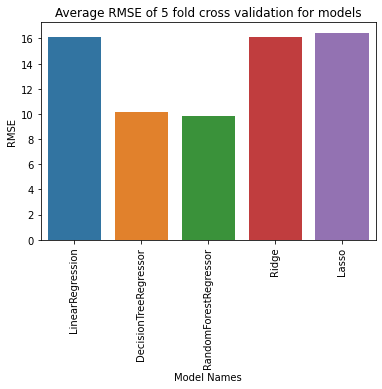

In [21]:
# visualizing RMSE
sns.barplot(x= model_name,y=average_rmse)
plt.title("Average RMSE of 5 fold cross validation for models")
plt.xticks(rotation=90)
plt.xlabel("Model Names")
plt.ylabel("RMSE")
plt.show()

Representing the RMSE Value on a Barplot

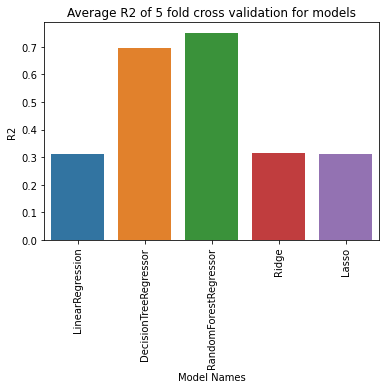

In [22]:
sns.barplot(x= model_name,y=average_r2_score)
plt.title("Average R2 of 5 fold cross validation for models")
plt.xticks(rotation=90)
plt.xlabel("Model Names")
plt.ylabel("R2")
plt.show()

Representing the R^2 Values on a barplot.

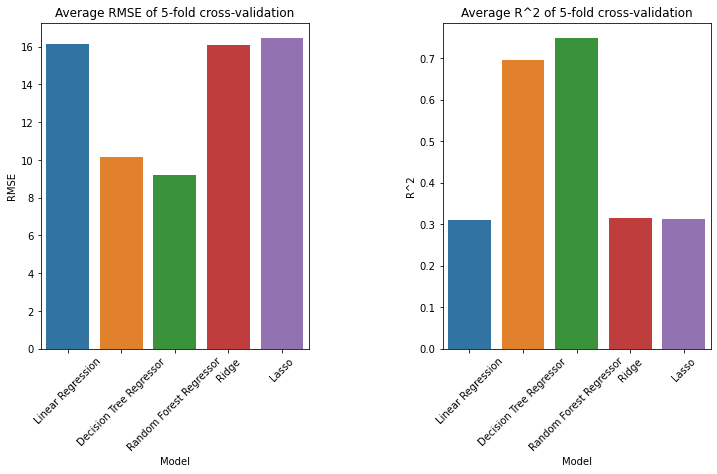

In [23]:
# Create a DataFrame to store the scores
scores_df = pd.DataFrame({
    "Model": model_names,
    "Average RMSE": rmse_scores,
    "Average R^2": r2_scores
})

# Create subplots to display the RMSE and R2 scores side-by-side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Create a bar plot of the RMSE scores
sns.barplot(x="Model", y="Average RMSE", data=scores_df, ax=ax1)
ax1.set_title("Average RMSE of 5-fold cross-validation")
ax1.set_xlabel("Model")
ax1.set_ylabel("RMSE")
ax1.tick_params(axis="x", rotation=45)

# Create a bar plot of the R2 scores
sns.barplot(x="Model", y="Average R^2", data=scores_df, ax=ax2)
ax2.set_title("Average R^2 of 5-fold cross-validation")
ax2.set_xlabel("Model")
ax2.set_ylabel("R^2")
ax2.tick_params(axis="x", rotation=45)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5)

# Display the plot
plt.show()

With the highest R^2 score, and lowest RMSE, Random Forest regression is the most compatible and effective predictor of market value. Decision Tree regression was a close second.

# Random Forest Regression

Random forest regression is an ensemble learning method that combines the predictions of multiple decision trees to produce a more accurate and stable prediction. It works by building multiple decision trees on random subsets of the training data and features, then aggregating the predictions of all trees to reduce variance and overfitting. Its accuracy and effectiveness stem from its ability to handle large datasets with many features, handle missing data and outliers, perform well on both linear and non-linear data, and be used for both regression and classification tasks. It is widely used in various industries due to its high accuracy and effectiveness in predicting outcomes.

In [24]:
# We will perform grid search cv to tune parameters for the RandomForestRegressor
param = {"n_estimators":[100,200,300],"max_features":["sqrt","log2"],"oob_score":["True","False"]}
rfr = RandomForestRegressor()
grid_search = GridSearchCV(rfr,param_grid=param,cv=3,scoring='neg_root_mean_squared_error')

In [25]:
# fitting the grid search on the training data
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300],
                         'oob_score': ['True', 'False']},
             scoring='neg_root_mean_squared_error')

In [26]:
print("Tuned Random Forest Regressor Parameters: {}".format(grid_search.best_params_))
print("Best score is {}".format(-1 * grid_search.best_score_))

Tuned Random Forest Regressor Parameters: {'max_features': 'log2', 'n_estimators': 300, 'oob_score': 'False'}
Best score is 11.382414687128849


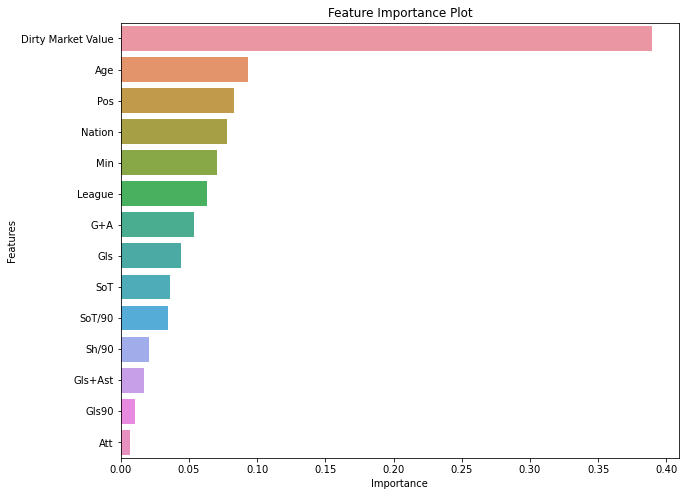

In [27]:
# train a random forest regression model with best models
rf = RandomForestRegressor(max_features = 'sqrt', n_estimators = 100, oob_score ='True')
rf.fit(X_train,y_train)

# examine the feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
feature_names = X.columns

# create a dataframe to store the feature importance values
fi_df = pd.DataFrame({'feature_names': feature_names, 'importance': importances})
fi_df = fi_df.sort_values('importance', ascending=False)

# plot the feature importances using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature_names', data=fi_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Based on feature Importance, Age is the most important factor for predicting Market Value with a feature importance score of 0.07.

# Decision Tree Regression

Decision Tree Regression uses a tree-like structure to predict a continuous target variable based on input features by recursively splitting the data.
The algorithm selects the feature that provides the most information gain at each split to determine how to partition the data.
Decision tree regression can make results more accurate by handling non-linear relationships, interactions between features, and missing values in the data, which allows it to capture complex patterns in the data that other algorithms may miss.


Tuned Decision Tree Regressor Parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score is 11.951471129437595


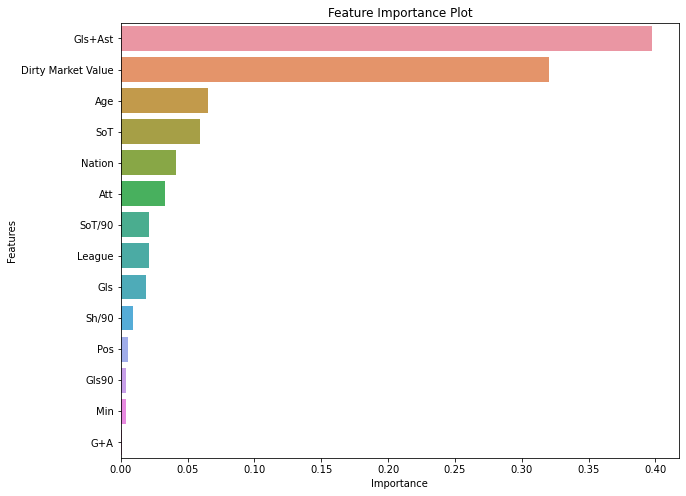

In [45]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a decision tree regressor object
dt = DecisionTreeRegressor()

# Create a GridSearchCV object to tune hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='neg_root_mean_squared_error')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and RMSE score
print("Tuned Decision Tree Regressor Parameters: {}".format(grid_search.best_params_))
print("Best score is {}".format(-1 * grid_search.best_score_))

# Train a decision tree regressor with the best hyperparameters
dt = DecisionTreeRegressor(**grid_search.best_params_)
dt.fit(X_train, y_train)

# Extract the feature importances
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Create a dataframe to store the feature importances
fi_df = pd.DataFrame({'feature_names': importances.index, 'importance': importances})
fi_df = fi_df.sort_values('importance', ascending=False)

# Plot the feature importances using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature_names', data=fi_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

The Decision Tree regression seems to identify Goals & Assists as the most important feature for predicting market value at 0.38.
Like the RandomForest Regression method, Age (0.07) is also one of the most important features for predicting market value.

# Predicting Market Value With Age : Linear Regression Model

In [51]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

newballdata = pd.DataFrame(balldata[["Market Value","Age","Min"]])

newballdata.isnull().sum()
newballdata['Age'].replace({np.NaN:newballdata['Age'].mean()},inplace=True)
newballdata['Min'].replace({np.NaN:newballdata['Min'].mean()},inplace=True)

In [52]:
age= pd.DataFrame(newballdata['Age'])   # Predictor
mv = pd.DataFrame(newballdata['Market Value'])  # Response

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test randomly
X_train, X_test, y_train, y_test = train_test_split(age, mv, test_size = 0.20)

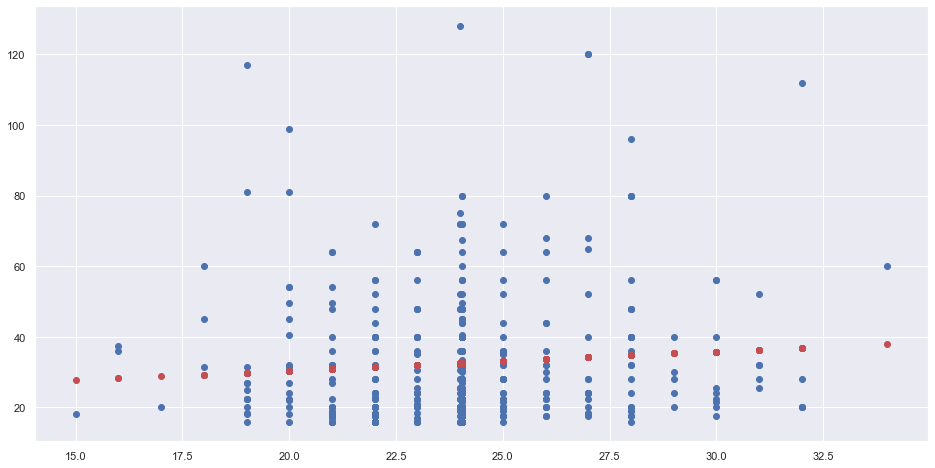

Intercept 	: b =  [19.57546536]
Coefficients 	: a =  [[0.54140264]]


In [53]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Predict Total values corresponding to GLA
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)


# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

In [54]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
mse1 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse1)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
mse2 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse2)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse2))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.006546306005524416
Mean Squared Error (MSE) 	: 344.2097238691137
Root Mean Squared Error (RMSE) 	: 18.55288990613359

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0032806043121912376
Mean Squared Error (MSE) 	: 633.3038559679243
Root Mean Squared Error (RMSE) 	: 25.16552912155682



We performed linear regression on age, which clearly shows random scattering of points around the linear regression line and a poor linear relationship of age with market value. This explains the correlation score of 0.1


# Predicting Market Value With Minutes Played : Linear Regression Model

In [55]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

mp= pd.DataFrame(newballdata['Min'])   # Predictor
mv = pd.DataFrame(newballdata['Market Value'])  # Response


# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test randomly
X_train, X_test, y_train, y_test = train_test_split(mp, mv, test_size = 0.20)

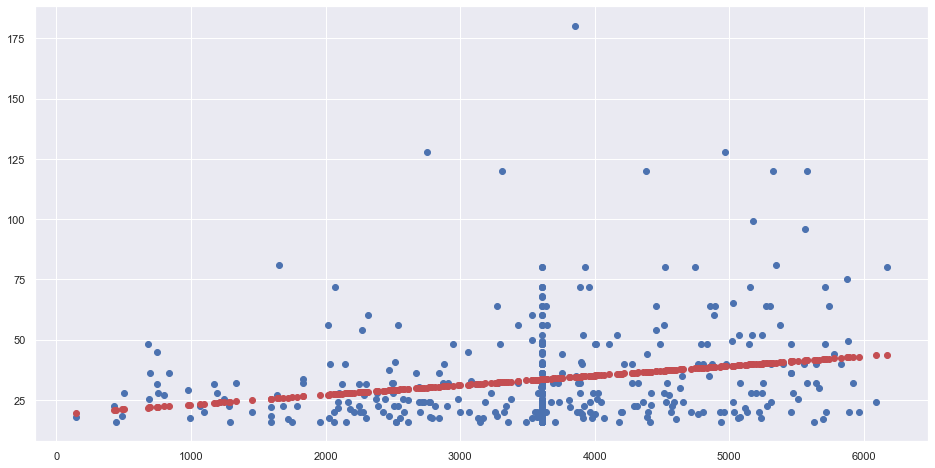

Intercept 	: b =  [19.09259878]
Coefficients 	: a =  [[0.00399695]]


In [57]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Predict Total values corresponding to GLA
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)




# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

In [58]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
mse1 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse1)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
mse2 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse2)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse2))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.05255733895268655
Mean Squared Error (MSE) 	: 406.8681801901445
Root Mean Squared Error (RMSE) 	: 20.170973704562318

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.02621688235604891
Mean Squared Error (MSE) 	: 299.2625442439857
Root Mean Squared Error (RMSE) 	: 17.29920646284059



We performed linear regression on Minutes Played, which clearly shows random scattering of points around the linear regression line and a poor linear relationship of age with market value. This explains the correlation score of 0.22.

# References 

Chauhan, N. S. (n.d.). Decision Tree Algorithm, Explained - KDnuggets. KDnuggets. https://www.kdnuggets.com/decision-tree-algorithm-explained.html

Football Market Size, Share, Trends | Industry Forecast 2023-2028. (n.d.). Football Market Size, Share, Trends | Industry Forecast 2023-2028. https://www.imarcgroup.com/football-market

R-Squared. (n.d.). Corporate Finance Institute. https://corporatefinanceinstitute.com/resources/data-science/r-squared/

Root Mean Square Error (RMSE). (n.d.). C3 AI. https://c3.ai/glossary/data-science/root-mean-square-error-rmse/

Yiu, T. (2021, September 29). Understanding Random Forest. Medium. https://towardsdatascience.com/understanding-random-forest-58381e0602d2